# Project:     The Movie Database (TMDb)
-------
![](https://images.pexels.com/photos/1117132/pexels-photo-1117132.jpeg?crop=entropy&cs=srgb&dl=pexels-martin-lopez-1117132.jpg&fit=crop&fm=jpg&h=426&w=640)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction
<a id='intro'></a>

#### In this project , TMDb Movie Dataset contain 10000 movies , I will analyze the database including their details of budget, Director, runtime , genres ,popularity , ...

#### Questions i plan to explore in the report.

> 1. Which genres are most popular from year to year?
> 2. What kinds of properties are associated with movies that have high revenues? 
>        Best Director  with high revenues
>        Best runtime with high revenues
>        Best budget_adj with high revenues
>        Best genres with high revenues
> 3. Is the number of movies increasing every year?
> 4. What is the most common 30 keywords in all the genres ?
> 5. In what year did they get the highest film revenue ?

#### import all packages

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [74]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [75]:
datebase_shape = np.asarray(df.shape)
print('Number of :- rows = {} , columns = {}'.format(datebase_shape[0],datebase_shape[1]))

Number of :- rows = 10866 , columns = 21


In [76]:
df.info() # some informstion about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [77]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Delete some unused columns

In [78]:
df.drop(columns=['id','imdb_id','homepage','overview','tagline','cast','production_companies'], inplace=True)

##### Get a Number of duplicate rows  and Remove  it .

In [79]:
df.duplicated().sum()

1

In [80]:
df.drop_duplicates(inplace=True)

#### Get a number of null value  and Remove it .

In [81]:
df.isnull().sum()

popularity           0
budget               0
revenue              0
original_title       0
director            44
keywords          1493
runtime              0
genres              23
release_date         0
vote_count           0
vote_average         0
release_year         0
budget_adj           0
revenue_adj          0
dtype: int64

In [82]:
df.dropna(subset=['genres','director'], inplace=True) # drop all null value in ( genres , director )

Check if some zero values in some numeric columns like revenue. 

In [83]:
(df['revenue'] == 0 ).sum()

5952

###### replace all zero values to null value and remove it

In [84]:
df.replace(0,np.NaN,inplace=True)
df.dropna(inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

### Which genres are most popular from year to year?

In [104]:
df['genres']

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10822                                        Drama
10828                             Mystery|Thriller
10829                               Action|Western
10835           Action|Adventure|Drama|War|Romance
10848                    Adventure|Science Fiction
Name: genres, Length: 3716, dtype: object

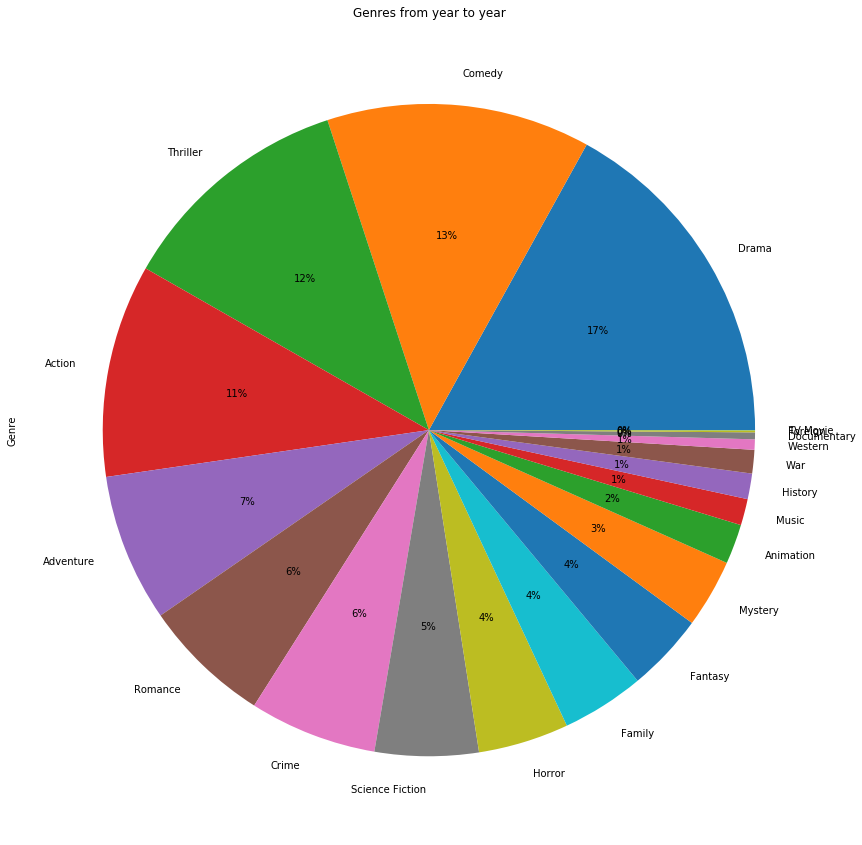

In [105]:
split = df.genres.str.split('|', expand=True).stack().value_counts() # Convert column to array and count the genres
split.plot(kind='pie',figsize=(15,15),label='Genre',autopct='%1.0f%%'); # then plot the genres
plt.title('Genres from year to year');

#### the most popular  genres  from year to year is ( 1- Drama ,2- Comedy,3- Thriller ,4- Action ,5-  Adventure , .. )

# What kinds of properties are associated with movies that have high revenues?

>1. budget_adj is the best  189164428
>2. Best Director is Peter Jackson , Joss Whedon , James Cameron , Christopher Nolan , ...           
>3. Best runtime is 130 to 143 
>4. Best genres Action|Adventure|Fantasy|Science Fiction

In [88]:
best_revenues = df[df['revenue'] > 1000000000]
best_revenues

,popularity,budget,revenue,original_title,director,keywords,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136.0,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,car race|speed|revenge|suspense|car,137.0,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
8,7.404165,74000000.0,1.156731e+09,Minions,Kyle Balda|Pierre Coffin,assistant|aftercreditsstinger|duringcreditssti...,91.0,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
14,5.944927,280000000.0,1.405036e+09,Avengers: Age of Ultron,Joss Whedon,marvel comic|comic|sequel|superhero|vision,141.0,Action|Adventure|Science Fiction,4/22/15,4304,7.4,2015,2.575999e+08,1.292632e+09
1386,9.432768,237000000.0,2.781506e+09,Avatar,James Cameron,culture clash|future|space war|space colony|so...,162.0,Action|Adventure|Fantasy|Science Fiction,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
1921,5.572950,200000000.0,1.025467e+09,Alice in Wonderland,Tim Burton,based on novel|fictional place|queen|alice in ...,108.0,Family|Fantasy|Adventure,3/3/10,2853,6.3,2010,2.000000e+08,1.025467e+09
1930,2.711136,200000000.0,1.063172e+09,Toy Story 3,Lee Unkrich,hostage|college|toy|barbie|animation,103.0,Animation|Family|Comedy,6/16/10,2924,7.5,2010,2.000000e+08,1.063172e+09
2875,8.466668,185000000.0,1.001922e+09,The Dark Knight,Christopher Nolan,dc comics|crime fighter|secret identity|scarec...,152.0,Drama|Action|Crime|Thriller,7/16/08,8432,8.1,2008,1.873655e+08,1.014733e+09
3374,5.711315,125000000.0,1.327818e+09,Harry Potter and the Deathly Hallows: Part 2,David Yates,self sacrifice|magic|frog|sorcerer|school,130.0,Adventure|Family|Fantasy,7/7/11,3750,7.7,2011,1.211748e+08,1.287184e+09


#### Best budget_adj with high revenues

In [89]:
best_revenues.budget_adj.value_counts() 

2.000000e+08    2
2.374361e+08    2
6.807997e+07    1
1.873655e+08    1
3.683713e+08    1
1.839999e+08    1
1.379999e+08    1
1.890326e+08    1
1.114231e+08    1
1.899489e+08    1
1.211748e+08    1
2.089437e+08    1
2.716921e+08    1
3.148127e+07    1
2.408869e+08    1
2.163338e+08    1
1.872067e+08    1
1.404050e+08    1
1.747999e+08    1
2.575999e+08    1
Name: budget_adj, dtype: int64

In [90]:
best_revenues.budget_adj.mean() 

189164428.45123404

#### Best Director with high revenues

In [91]:
best_revenues.director.value_counts() 

Joss Whedon                 2
Christopher Nolan           2
James Cameron               2
Peter Jackson               2
Shane Black                 1
J.J. Abrams                 1
Colin Trevorrow             1
Lee Unkrich                 1
Michael Bay                 1
Gore Verbinski              1
David Yates                 1
James Wan                   1
Rob Marshall                1
Sam Mendes                  1
Kyle Balda|Pierre Coffin    1
Irwin Winkler               1
Chris Buck|Jennifer Lee     1
Tim Burton                  1
Name: director, dtype: int64

#### Best runtime with high revenues

In [92]:
best_revenues.runtime.value_counts() 

130.0    2
136.0    2
143.0    2
152.0    1
137.0    1
91.0     1
141.0    1
162.0    1
108.0    1
103.0    1
114.0    1
151.0    1
154.0    1
165.0    1
169.0    1
201.0    1
194.0    1
102.0    1
124.0    1
Name: runtime, dtype: int64

### Function for ploting 

In [131]:
def plot_bar(colums,title,xlabel,ylabel):
    colums.plot(kind='bar',figsize=(19,5));
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()

## Is the number of movies increasing every year?

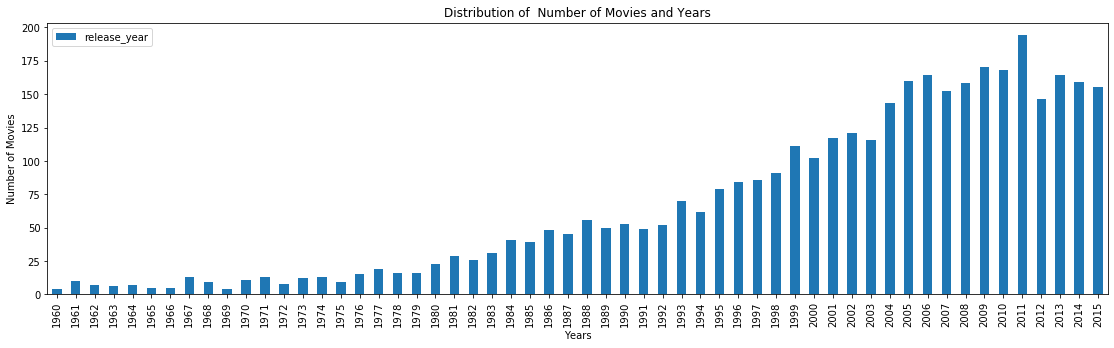

In [132]:
number_of_movies = df["release_year"].value_counts().sort_index() 
plot_bar(number_of_movies,'Distribution of  Number of Movies and Years','Years','Number of Movies')

###### From 1960 to 1980, the number of films is no more than 25, and it is changed randomly, and from 1960 to 2003, the number of films does not exceed 125, and Then the number of films began to exceed 150 per year .

### What is the most common 30 keywords  in all the genres ?

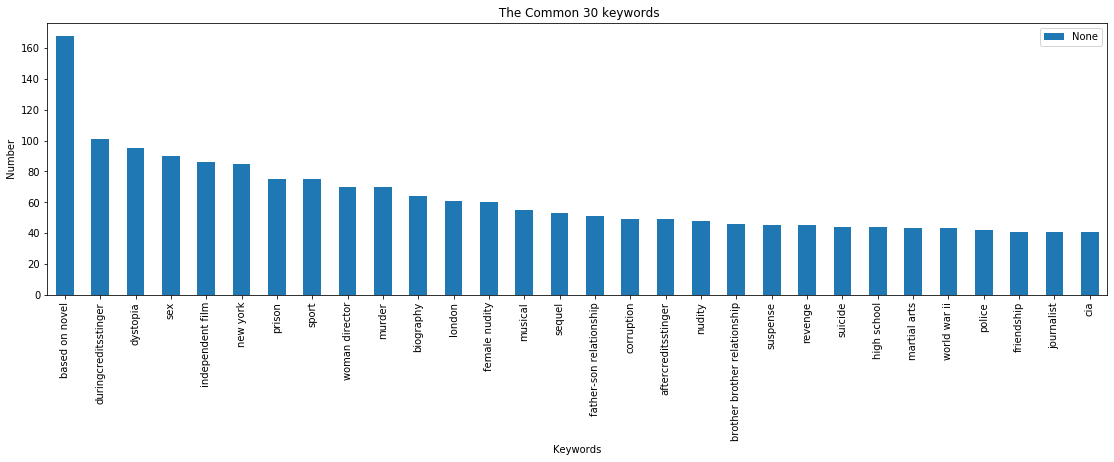

In [134]:
split = df.keywords.str.split('|', expand=True).stack().value_counts()
plot_bar(split[:30],' The Common 30 keywords','Keywords',' Number ')

#### The Common 30 keywords is (based on novel , duringcreditsstinger , dystopia , sex , ...)

### In what year did they get the highest film revenue ?

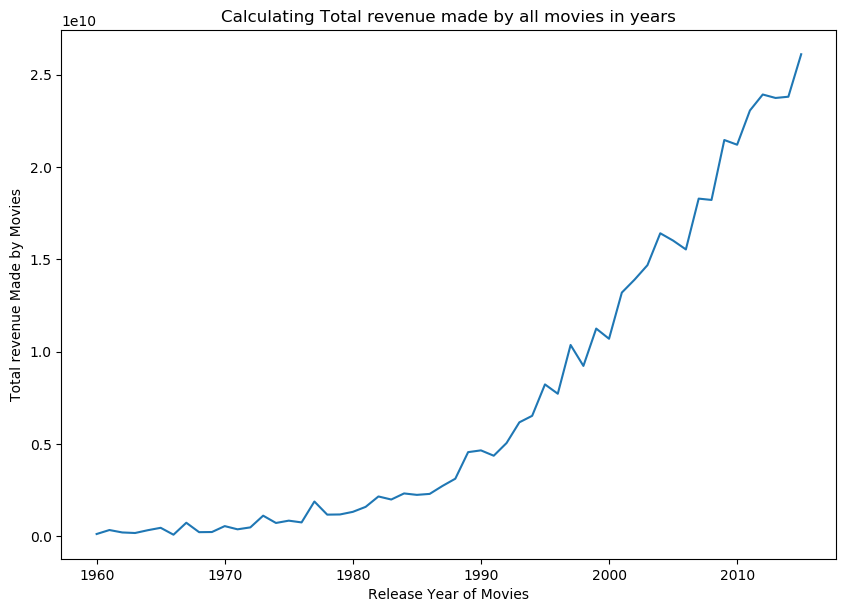

In [145]:
revenue_each_year = df.groupby('release_year')['revenue'].sum()
plt.figure(figsize=(10,7), dpi = 100)
plt.xlabel('Release Year of Movies', fontsize = 10)
plt.ylabel('Total revenue Made by Movies', fontsize = 10)
plt.title('Calculating Total revenue made by all movies in years')
plt.plot(revenue_each_year)
plt.show()

> Revenues remained constant from 1960 to 1970, and then began to rise from 1970 to 2020.

<a id='conclusions'></a>
## Conclusions
### If you want to get high revenues, you must choose :- 
#### Director ( 1- Peter Jackson ,2-  Joss Whedon ,3-  James Cameron ,4-  Christopher Nolan , ...)
#### runtime between  130 to 143 min 
#### Best genres (1- Action , 2-Adventure , 3- Fantasy , 4- Science Fiction , ...)



####   The most popular genres from year to year is ( 1- Drama , 2- Comedy , 3- Thriller , 4- Action , 5- Adventure , .. )

#### By doing all this, the chances of making a profitable movie are Big ^_^